In [1]:
import numpy as np
from IPython.display import Image, display

# Thermal anchoring of wires

Wire is thermally anchored at four stages

- At 300 K 
- At 150K (approximately) 
- At 80K (approximately) 
- At 4K

## MW wire

- Outer diameter = 1.40 mm
- Inner conductor diamter = 0.26 mm
- PTFE diameter = 1 mm
- Copper braid diameter = 1.1 mm
- SS braid = 1.25 mm

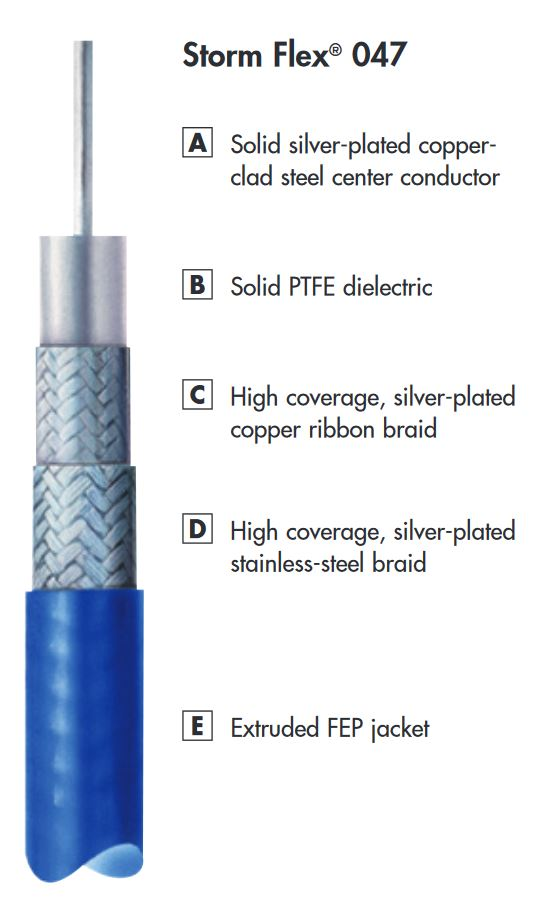

In [2]:
display(Image(filename="stormflex.jpg", width=300))

## Copper wiring
The thermal conductivity depends heavily on the Residual  Resistive  Ratio  (RRR)

- for  ordinary  coppers,  5 <  RRR <  150;
- for  Oxygen-Free High  thermal  Conductivity(OFHC) coppers, 100 < RRR < 200;
- for very pure coppers,  200 < RRR < 5000.

We assume an RRR = 40 (similar to value used by Montana Instruments)

Conductivity curve from https://arxiv.org/ftp/arxiv/papers/1501/1501.07100.pdf

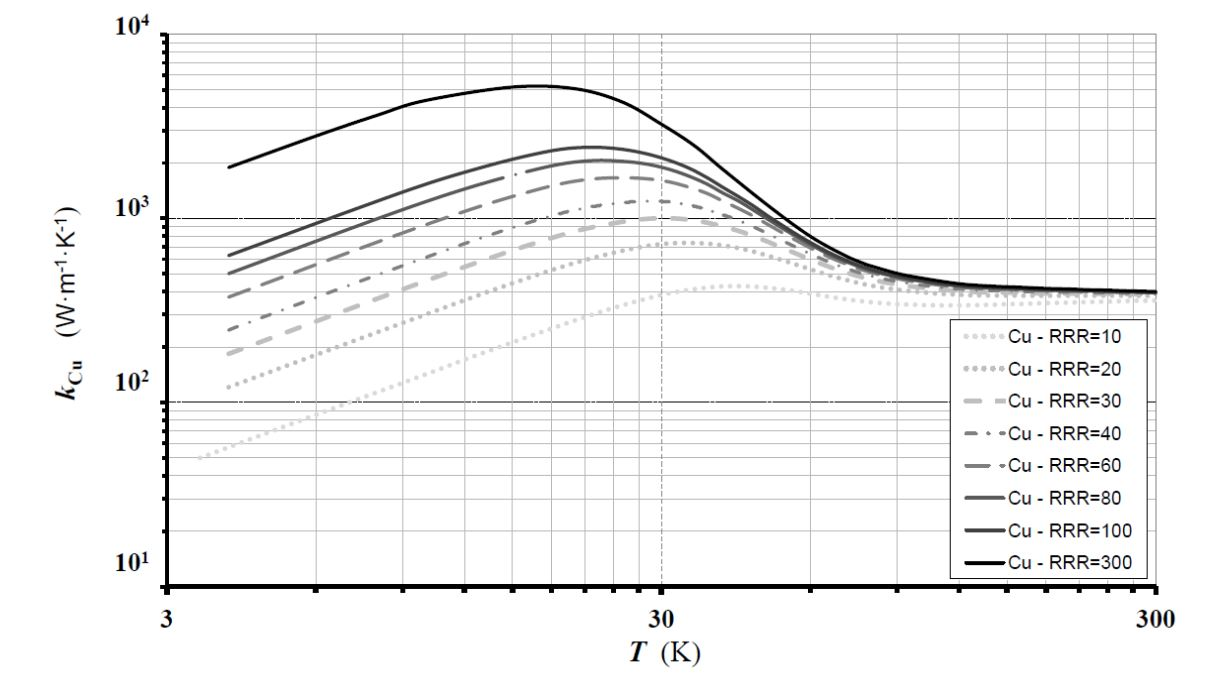

In [3]:
display(Image(filename="k_copper.jpg", width=600))

## Manganin and PhBr wires

Thermal conductivity values from Lakeshore website:

https://www.lakeshore.com/products/categories/specification/temperature-products/cryogenic-accessories/cryogenic-wire

# Thermal resistance

$$ R = \frac{L}{kA} $$


In series, 

$$R = R_1 + R_2 ...$$

In parallel, 

$$\frac{1}{R} = \frac{1}{R_1} + \frac{1}{R_2} ...$$


To find heat transferred,  

$$ Q = \frac{\Delta T}{R} $$

# Considering all wires in system

In [2]:
# Thermal conductivity Copper (W/(m*K))
k_Cu_300K = 400 
k_Cu_150K = 429
k_Cu_80K = 557
k_Cu_4K = 300

# Thermal conductivity Manganin (W/(m*K))
k_Mn_300K = 22 
k_Mn_150K = 16
k_Mn_80K = 13
k_Mn_4K = 0.5

# Thermal conductivity PhBr (W/(m*K))
k_Ph_300K = 48 
k_Ph_150K = 34
k_Ph_80K = 25
k_Ph_4K = 1.6

# Lengths (m)
L_300_150 = 0.1 # Distance to first thermalization stage (approx. 150 K)
L_150_80 = 0.1 # Distance to second thermalization stage (approx. 80 K)
L_80_4 = 0.8 # Distance to baseplate thermalization stage (approx. 4 K)

# Areas (m^2)
A_Cu1 = np.pi * (0.18e-3/2)**2 # Cu wiring 0.18 mm diameter
A_Cu2 = np.pi * (0.224e-3/2)**2 # Cu wiring 0.224 mm diameter
A_Mn = np.pi * (0.15e-3/2)**2 # Mn wiring 0.15 mm diameter
A_Ph = np.pi * (0.127e-3/2)**2 # PhBr wiring 0.127 mm diameter
# Microwave cable area (m^2) (inner conductor and outer braid, both Copper)
A_inner = np.pi * (0.26e-3/2)**2
A_braid = np.pi * (1.1e-3/2)**2 - np.pi * (1e-3/2)**2
A_MW = A_inner + A_braid

In [4]:
# Total series resistance of each wire
R_Cu1 = 1/A_Cu1 * (L_300_150/k_Cu_150K + L_150_80/k_Cu_80K + L_80_4/k_Cu_4K)
R_Cu2 = 1/A_Cu2 * (L_300_150/k_Cu_150K + L_150_80/k_Cu_80K + L_80_4/k_Cu_4K)
R_Mn = 1/A_Mn * (L_300_150/k_Mn_150K + L_150_80/k_Mn_80K + L_80_4/k_Mn_4K)
R_Ph = 1/A_Ph * (L_300_150/k_Ph_150K + L_150_80/k_Ph_80K + L_80_4/k_Ph_4K)
R_MW = 1/A_MW * (L_300_150/k_Cu_150K + L_150_80/k_Cu_80K + L_80_4/k_Cu_4K)

# Taking all similar wires in parallel
R_Cu1_parallel = R_Cu1/20
R_Cu2_parallel = R_Cu2/22
R_Mn_parallel = R_Mn/3
R_Ph_parallel = R_Ph/18
R_MW_parallel = R_MW/4

# Total resistance of parallel combination of similar wires
R_total = 1/(1/R_Cu1_parallel + 1/R_Cu2_parallel + 1/R_Mn_parallel + 1/R_Ph_parallel + 1/R_MW_parallel)

# Heat load from total resistance
Q_total = (300 - 4)/R_total

print(f"Total heat load = {int(Q_total*1e3)} mW")

Total heat load = 64 mW
